## ARIMA - Exercício
Neste exercício você deve criar um modelo ARIMA para a série temporal 'produção de eletricidade'. 

Faça o seasonal decompose para decidir se há sazonalidade. Em caso afirmativo, use seasonal=True no seu modelo. Crie um modelo simples utilizando o auto_arima, com teste de 70% e treino de 30%. Plote uma previsão para os próximos 12 meses.

In [60]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima 

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('producao_eletricidade.csv' , index_col = 0, parse_dates=True)
df

,Production
DATE,
2008-02-01,108.2353
2008-03-01,100.4386
2008-04-01,90.9944
2008-05-01,91.2348
2008-06-01,103.9581
...,...
2017-08-01,108.9312
2017-09-01,98.6154
2017-10-01,93.6137


Vamos agora plotar nossa série.

In [61]:
train = df[:int(0.7*(len(df)))]
test = df[int(0.7*(len(df))):]

<Axes: xlabel='DATE'>

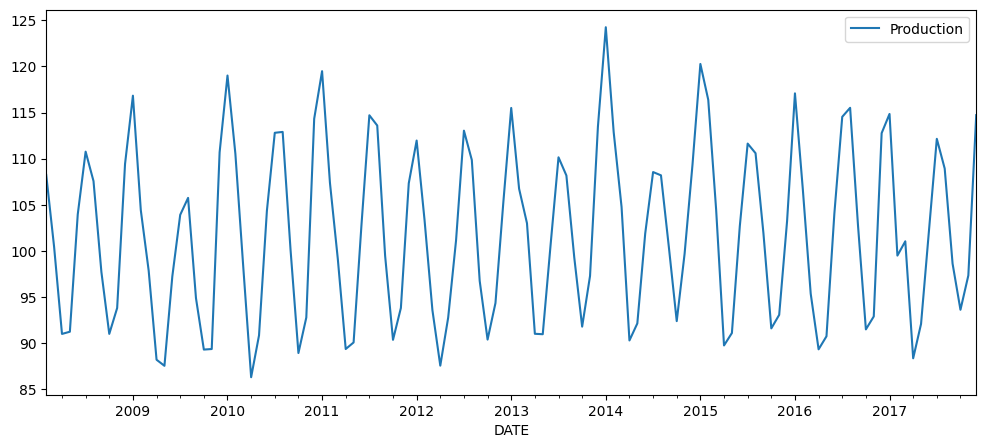

In [62]:
df.plot(figsize=(12,5))

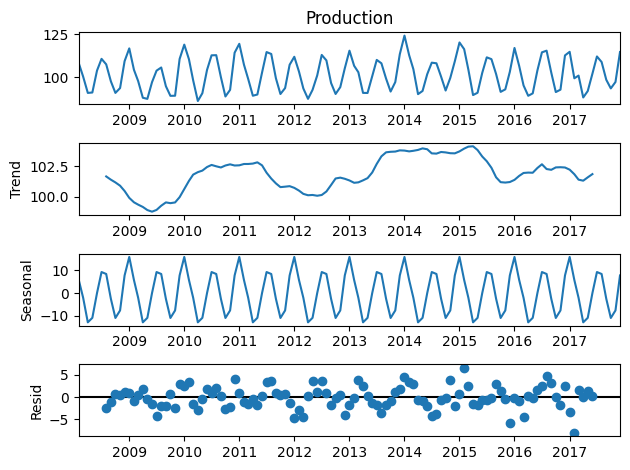

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Production'], model='additive')  # model='add' also works
result.plot();

In [64]:
modelo = auto_arima(train['Production'], seasonal=True, m=12)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   83
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -170.920
Date:                            Wed, 30 Apr 2025   AIC                            349.841
Time:                                    20:18:12   BIC                            358.891
Sample:                                02-01-2008   HQIC                           353.440
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5974      0.107      5.580      0.000       0.388       0.807
ar.S.L12      -0.4498      0.108     -4.176      0.000      -0.661      -0.239
ar.S.L24      -0.3776      0.141     -2.676      0.007      -0.654      -0.101
sigma2         6.6827      1.311      5.097      0.000       4.113       9.252
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.66   Prob(JB):                         0.64
Heteroskedasticity (H):               1.10   Skew:                             0.05
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
test['Predicted'] = modelo.predict(n_periods = len(test))
test.head()

,Production,Predicted
DATE,,
2015-01-01,120.2696,118.256796
2015-02-01,116.3788,108.411846
2015-03-01,104.4706,100.152641
2015-04-01,89.7461,89.153211
2015-05-01,91.0930,92.193626


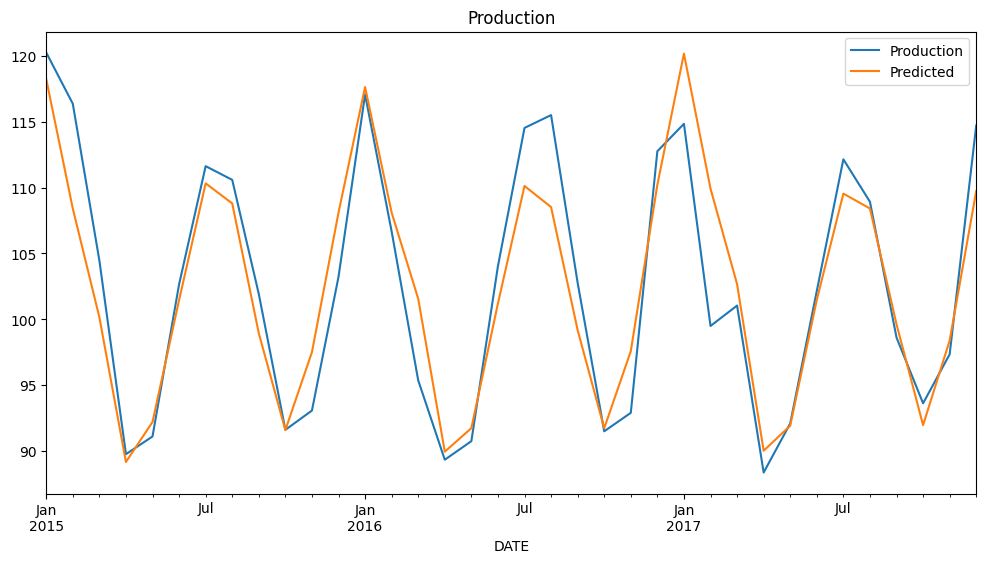

In [66]:
# Plot predictions against known values
title = 'Production'
ylabel='Prod'
xlabel='' # we don't really need a label here

ax = test['Production'].plot(legend=True,figsize=(12,6),title=title)
test['Predicted'].plot(legend=True)
ax.autoscale(axis='x',tight=True)


In [69]:
modelo = auto_arima(df['Production'], seasonal=True,m=12)
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -269.332
Date:                            Wed, 30 Apr 2025   AIC                            546.663
Time:                                    20:19:06   BIC                            557.355
Sample:                                02-01-2008   HQIC                           550.998
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4865      0.081      5.983      0.000       0.327       0.646
ar.S.L12      -0.3951      0.090     -4.368      0.000      -0.572      -0.218
ar.S.L24      -0.4834      0.108     -4.490      0.000      -0.694      -0.272
sigma2         8.3802      1.162      7.211      0.000       6.103      10.658
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.66   Prob(JB):                         0.97
Heteroskedasticity (H):               1.89   Skew:                            -0.06
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
prev = modelo.predict(n_periods=12)
prev

2018-01-01    118.616956
2018-02-01    107.673844
2018-03-01    103.517676
2018-04-01     89.095292
2018-05-01     91.797002
2018-06-01    102.263442
2018-07-01    111.710516
2018-08-01    109.161863
2018-09-01     99.851088
2018-10-01     92.828105
2018-11-01     95.663742
2018-12-01    109.334839
Freq: MS, dtype: float64

[Text(0.5, 0, ''), Text(0, 0.5, '')]

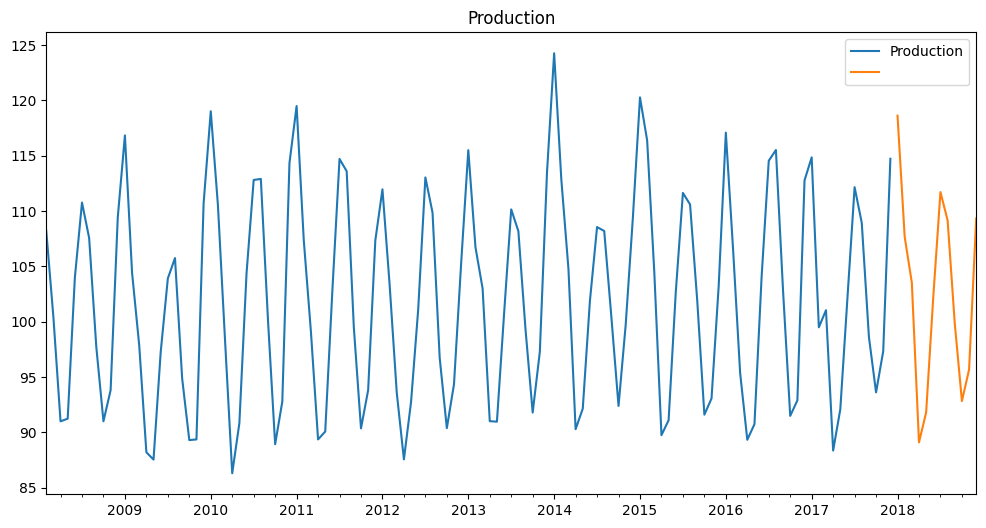

In [72]:
# Plot predictions against known values
title = 'Production'
ylabel=''
xlabel='' # we don't really need a label here

ax = df['Production'].plot(legend=True,figsize=(12,6),title=title)
prev.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
